In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get the data 
df_test = pd.read_csv("2019_test.csv")
df_train = pd.read_csv("2019_train.csv")
df_test = df_test.drop(columns=["Unnamed: 0"])
df_train = df_train.drop(columns=["Unnamed: 0"])
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Marcus Mariota,TEN,QB,26,3,85.02,7,1332,184
1,Damien Williams,KAN,RB,27,1,141.10,7,711,141
2,Peyton Barber,TAM,RB,25,1,114.50,7,585,170
3,Tyler Higbee,LAR,TE,26,0,160.40,3,734,69
4,DeVante Parker,MIA,WR,26,0,246.20,9,1202,72


In [45]:
# Set up the training models in a list 
x_train = df_train.drop(columns=["Player", "Age", "Tm", "Pos", "FantasyPoints"]).to_numpy()
x_test = df_test.drop(columns=["Player", "Age", "Tm", "Pos", "FantasyPoints"]).to_numpy()

y_train = df_train["FantasyPoints"].to_numpy()
y_test = df_test["FantasyPoints"].to_numpy()

In [46]:
regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)


In [47]:
print (x_test)
print (y_pred)

[[   4   27 4091  639]
 [   2    6  961   71]
 [   2    4  374   73]
 [   2   15 1265  228]
 [   1    0  250   59]
 [   0    1  438   72]
 [   1    3 1150   92]
 [   2    3  839   59]
 [   0    3  441   70]
 [   1    8 1052   86]
 [   0    9  779   64]
 [   3   28 4249  527]
 [   3    5  646  129]
 [   0    3 1249  107]
 [   1    4 1065   79]
 [   4    2  551   97]
 [   1    1  382   90]
 [   3    3  669  143]
 [   7   23 4136  540]
 [   1    2  519   96]
 [   2   10  952  151]
 [   5   19 3331  564]
 [   2    3  685   54]
 [   2    3  759  121]
 [   2    7 1074  267]
 [  14   29 3599  570]
 [   3    6 1049  151]
 [   0    8 1189  108]
 [   1    5  820  127]
 [   1    3  577   70]
 [   1    6  916   88]
 [   1    2  515  118]
 [   4   13 1807  304]
 [   5   24 4266  635]
 [   0    3  198   88]
 [   0    2  699  179]
 [   3    0  355   53]
 [   6   12 1719  256]]
[331.87167291 159.20529464 117.93357567 204.75136641  99.11014164
 122.11926239 156.25217018 136.61389124 134.95331094 183.35

In [48]:
df_test['PredictedPoints'] = y_pred

In [49]:
df_test.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches,PredictedPoints
0,Tom Brady,NWE,QB,42,4,261.68,27,4091,639,331.871673
1,Deebo Samuel,SFO,WR,23,2,187.10,6,961,71,159.205295
2,Brian Hoyer,IND,QB,34,2,21.08,4,374,73,117.933576
3,Mark Ingram,BAL,RB,30,2,238.50,15,1265,228,204.751366
4,Will Grier,CAR,QB,24,1,1.32,0,250,59,99.110142


In [50]:
df_test['+/-'] = np.where(df_test['PredictedPoints'] > df_test['FantasyPoints'], False, True)
df_test.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches,PredictedPoints,+/-
0,Tom Brady,NWE,QB,42,4,261.68,27,4091,639,331.871673,False
1,Deebo Samuel,SFO,WR,23,2,187.10,6,961,71,159.205295,True
2,Brian Hoyer,IND,QB,34,2,21.08,4,374,73,117.933576,False
3,Mark Ingram,BAL,RB,30,2,238.50,15,1265,228,204.751366,True
4,Will Grier,CAR,QB,24,1,1.32,0,250,59,99.110142,False


In [51]:
model.intercept_


106.03597073145215

In [52]:
model.coef_

array([-9.73308301,  6.18522966,  0.04869464, -0.15875265])

In [53]:
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Marcus Mariota,TEN,QB,26,3,85.02,7,1332,184
1,Damien Williams,KAN,RB,27,1,141.10,7,711,141
2,Peyton Barber,TAM,RB,25,1,114.50,7,585,170
3,Tyler Higbee,LAR,TE,26,0,160.40,3,734,69
4,DeVante Parker,MIA,WR,26,0,246.20,9,1202,72


In [54]:
df_plot = df_train.drop(columns=["Player", "Age", "Tm", "Pos"])
df_train = df_train[['Fumbles','TDs','YDs', 'Touches','FantasyPoints']]

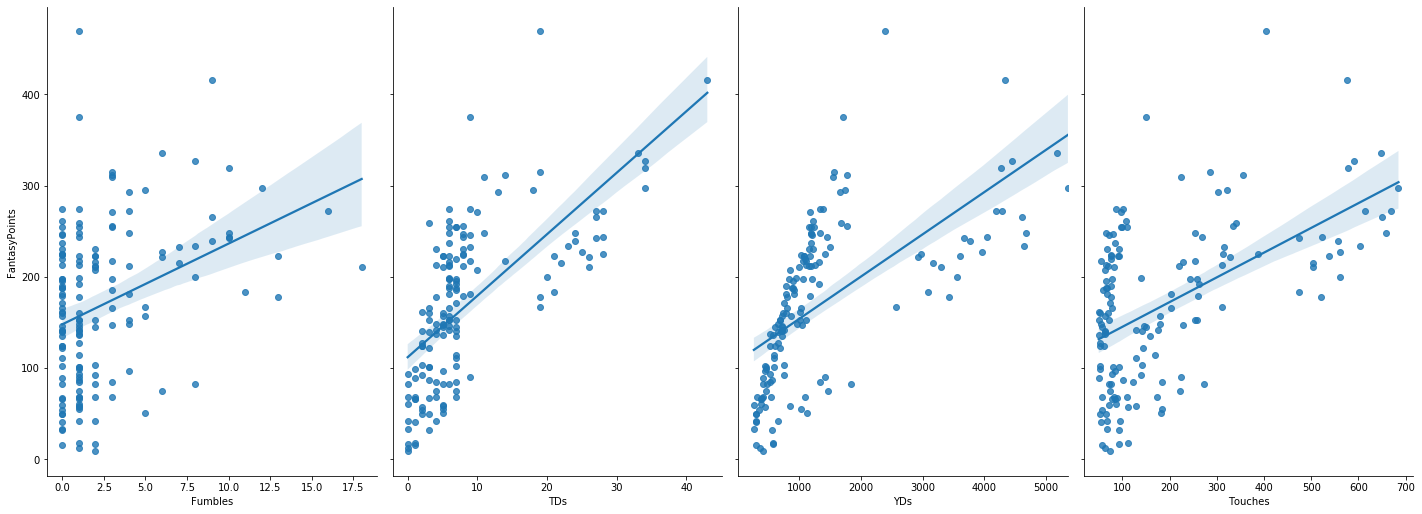

In [56]:
sns.pairplot(df_plot, x_vars=['Fumbles','TDs','YDs','Touches'], y_vars='FantasyPoints', size=7, aspect=0.7, kind='reg')

In [58]:
df_test.to_csv("./performance.csv")